In [38]:
import time
import numpy as np
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json

# preprocess load data

In [39]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train.feather' 
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train_sample.feather' 
train_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))


load feather %s seconds 1.5008654594421387


In [40]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test.feather'
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test_sample.feather' 

test_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))

load feather %s seconds 0.3840045928955078


In [42]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [43]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [44]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize



In [45]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [46]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [47]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent Internet User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No significant preference', 'Portal', 'Social-media'], dtype=object)

In [48]:
len(train_y)

1506103

In [49]:
len(test_y)

376526

# construct and compile model

In [68]:
classify_num = 11
epochs = 300
batch = 64

# basic config

In [70]:
start_time = time.time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(128, input_shape=train_x[0].shape ))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

print('Model compield in {0} seconds'.format(time.time() - start_time))


Compiling Model ... 
Model compield in 0.09327483177185059 seconds


# Train model

In [72]:
start_time = time.time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time.time() - start_time))


Training model...
Train on 1355492 samples, validate on 150611 samples
Epoch 1/300
85s - loss: 1.9526 - acc: 0.2992 - val_loss: 1.9282 - val_acc: 0.3067
Epoch 2/300
96s - loss: 1.9232 - acc: 0.3075 - val_loss: 1.9394 - val_acc: 0.3065
Epoch 3/300
94s - loss: 1.9166 - acc: 0.3092 - val_loss: 1.9213 - val_acc: 0.3054
Epoch 4/300
91s - loss: 1.9118 - acc: 0.3107 - val_loss: 1.9209 - val_acc: 0.3045
Epoch 5/300
93s - loss: 1.9085 - acc: 0.3116 - val_loss: 1.9060 - val_acc: 0.3140
Epoch 6/300
91s - loss: 1.9057 - acc: 0.3124 - val_loss: 1.9005 - val_acc: 0.3148
Epoch 7/300
91s - loss: 1.9032 - acc: 0.3134 - val_loss: 1.9112 - val_acc: 0.3132
Epoch 8/300
92s - loss: 1.9033 - acc: 0.3132 - val_loss: 1.9080 - val_acc: 0.3111
Epoch 9/300
92s - loss: 1.9029 - acc: 0.3138 - val_loss: 1.9396 - val_acc: 0.3100
Epoch 10/300
93s - loss: 1.9022 - acc: 0.3141 - val_loss: 1.9207 - val_acc: 0.3071
Epoch 11/300
90s - loss: 1.9025 - acc: 0.3139 - val_loss: 1.9136 - val_acc: 0.3126
Epoch 12/300
92s - loss: 

93s - loss: 1.9199 - acc: 0.3170 - val_loss: 1.9266 - val_acc: 0.3154
Epoch 100/300
92s - loss: 1.9206 - acc: 0.3169 - val_loss: 1.9160 - val_acc: 0.3189
Epoch 101/300
92s - loss: 1.9237 - acc: 0.3168 - val_loss: 1.9230 - val_acc: 0.3193
Epoch 102/300
90s - loss: 1.9254 - acc: 0.3167 - val_loss: 1.9345 - val_acc: 0.3175
Epoch 103/300
94s - loss: 1.9294 - acc: 0.3169 - val_loss: 1.9341 - val_acc: 0.3175
Epoch 104/300
93s - loss: 1.9295 - acc: 0.3167 - val_loss: 1.9418 - val_acc: 0.3177
Epoch 105/300
94s - loss: 1.9305 - acc: 0.3169 - val_loss: 1.9303 - val_acc: 0.3140
Epoch 106/300
93s - loss: 1.9283 - acc: 0.3166 - val_loss: 1.9352 - val_acc: 0.3145
Epoch 107/300
91s - loss: 1.9296 - acc: 0.3169 - val_loss: 1.9539 - val_acc: 0.3091
Epoch 108/300
94s - loss: 1.9374 - acc: 0.3170 - val_loss: 1.9394 - val_acc: 0.3190
Epoch 109/300
94s - loss: 1.9368 - acc: 0.3170 - val_loss: 1.9460 - val_acc: 0.3155
Epoch 110/300
93s - loss: 1.9340 - acc: 0.3169 - val_loss: 1.9451 - val_acc: 0.3169
Epoch 

91s - loss: 2.0547 - acc: 0.3166 - val_loss: 2.1191 - val_acc: 0.3158
Epoch 198/300
93s - loss: 2.0495 - acc: 0.3165 - val_loss: 1.9563 - val_acc: 0.3136
Epoch 199/300
94s - loss: 2.0704 - acc: 0.3165 - val_loss: 2.0235 - val_acc: 0.3164
Epoch 200/300
92s - loss: 2.1370 - acc: 0.3158 - val_loss: 2.0405 - val_acc: 0.3168
Epoch 201/300
92s - loss: 2.0792 - acc: 0.3162 - val_loss: 2.0357 - val_acc: 0.3165
Epoch 202/300
95s - loss: 2.0690 - acc: 0.3159 - val_loss: 2.1766 - val_acc: 0.3153
Epoch 203/300
91s - loss: 2.0738 - acc: 0.3168 - val_loss: 2.0806 - val_acc: 0.3166
Epoch 204/300
97s - loss: 2.0465 - acc: 0.3164 - val_loss: 2.0426 - val_acc: 0.3165
Epoch 205/300
92s - loss: 2.0578 - acc: 0.3165 - val_loss: 2.0083 - val_acc: 0.3174
Epoch 206/300
91s - loss: 2.1137 - acc: 0.3161 - val_loss: 2.5233 - val_acc: 0.3119
Epoch 207/300
91s - loss: 2.1097 - acc: 0.3163 - val_loss: 1.9669 - val_acc: 0.3151
Epoch 208/300
93s - loss: 2.1209 - acc: 0.3161 - val_loss: 2.1481 - val_acc: 0.3169
Epoch 

95s - loss: 2.2953 - acc: 0.3136 - val_loss: 2.1414 - val_acc: 0.3168
Epoch 296/300
90s - loss: 2.2925 - acc: 0.3137 - val_loss: 2.6524 - val_acc: 0.3067
Epoch 297/300
89s - loss: 2.4185 - acc: 0.3129 - val_loss: 3.2018 - val_acc: 0.3081
Epoch 298/300
91s - loss: 2.4235 - acc: 0.3124 - val_loss: 2.3788 - val_acc: 0.3150
Epoch 299/300
91s - loss: 2.2879 - acc: 0.3132 - val_loss: 2.2136 - val_acc: 0.3076
Epoch 300/300
93s - loss: 2.3304 - acc: 0.3130 - val_loss: 2.4005 - val_acc: 0.3032
Training duration : 27551.374199151993


In [73]:
train_time = time.time() - start_time

# save model

In [74]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


# test model and get accuracy

In [75]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

376160/376526 [============================>.] - ETA: 0s

In [76]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


acc: 30.29%


# send mail to alert

In [77]:
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

In [78]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



In [79]:
test=mail()
test.main("model finished", model_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


# write readme to report the model

In [80]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [81]:
print(model_info)

layer - > 0===============
class_name = Dense
units = 128
activation = linear
layer - > 1===============
class_name = Activation
activation = relu
layer - > 2===============
class_name = Dense
units = 64
activation = linear
layer - > 3===============
class_name = Activation
activation = relu
layer - > 4===============
class_name = Dense
units = 32
activation = linear
layer - > 5===============
class_name = Activation
activation = relu
layer - > 6===============
class_name = Dense
units = 11
activation = linear
layer - > 7===============
class_name = Activation
activation = softmax

train epochs = 300
train batch = 64
test batch = 32
train time = 27551.39390516281
loss = 2.39791243811


accuracy = 0.302937911327


In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
pred = model.predict(test_x)

In [85]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

array([[    0,     0,     0,   558,  4784,  2802,     0,     0,  2736,
            0,     0],
       [    0,     0,     0,  1846,  9850,  3460,     0,     0,  2134,
            1,     0],
       [    0,     0,     0,   631,  6156,  5859,     0,     0,  2384,
            0,     0],
       [    0,     0,     0, 20314,  7523,   326,     0,     0,   801,
            1,     0],
       [    0,     0,     0, 10814, 55773, 14247,     0,     0,  4087,
            0,     1],
       [    0,     0,     0,  4602, 47616, 27227,     0,     0,  6731,
            1,     0],
       [    0,     0,     0,   450, 11286,  9014,     0,     0,   271,
            0,     0],
       [    0,     0,     0,  1552,  6827,  1725,     0,     0,  1270,
            0,     0],
       [    0,     0,     0,  5500, 23617, 13538,     0,     0, 10749,
            0,     0],
       [    0,     0,     0,  2592,  9383,  3069,     0,     0,  4522,
            1,     0],
       [    0,     0,     0,  2834, 17178,  5340,     0,    

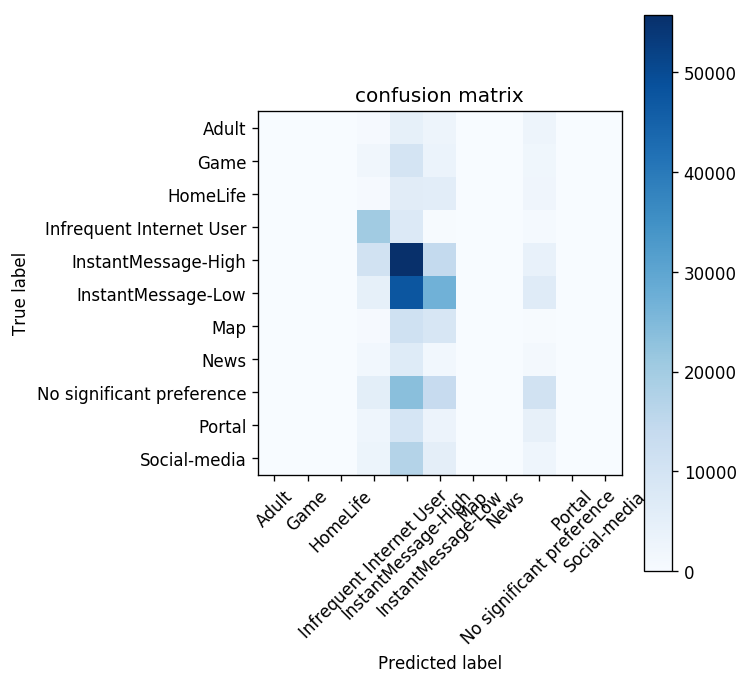

In [86]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [110]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)

[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
